(5622, 236) [0, 228, 245, 522, 614, 955, 1366, 1550, 1908, 2110, 2230, 2414, 2700, 3121, 3308, 3486, 3645, 3846, 4130, 4321, 4485, 4632, 4898, 4991, 5189, 5622]


/var/folders/_m/w5ywmxlj4n957rz1czm0c9wh0000gn/T/ipykernel_25981/1071608899.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\


(3814, 1107) [0, 6, 23, 298, 298, 636, 1046, 1230, 1588, 1790, 1910, 1910, 2196, 2245, 2432, 2476, 2476, 2677, 2677, 2745, 2875, 3022, 3288, 3288, 3394, 3814]


/var/folders/_m/w5ywmxlj4n957rz1czm0c9wh0000gn/T/ipykernel_25981/1071608899.py:35: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\


(3814, 1107) [0, 6, 23, 298, 298, 636, 1046, 1230, 1588, 1790, 1910, 1910, 2196, 2245, 2432, 2476, 2476, 2677, 2677, 2745, 2875, 3022, 3288, 3288, 3394, 3814]
(5622, 236) [0, 228, 245, 522, 614, 955, 1366, 1550, 1908, 2110, 2230, 2414, 2700, 3121, 3308, 3486, 3645, 3846, 4130, 4321, 4485, 4632, 4898, 4991, 5189, 5622]


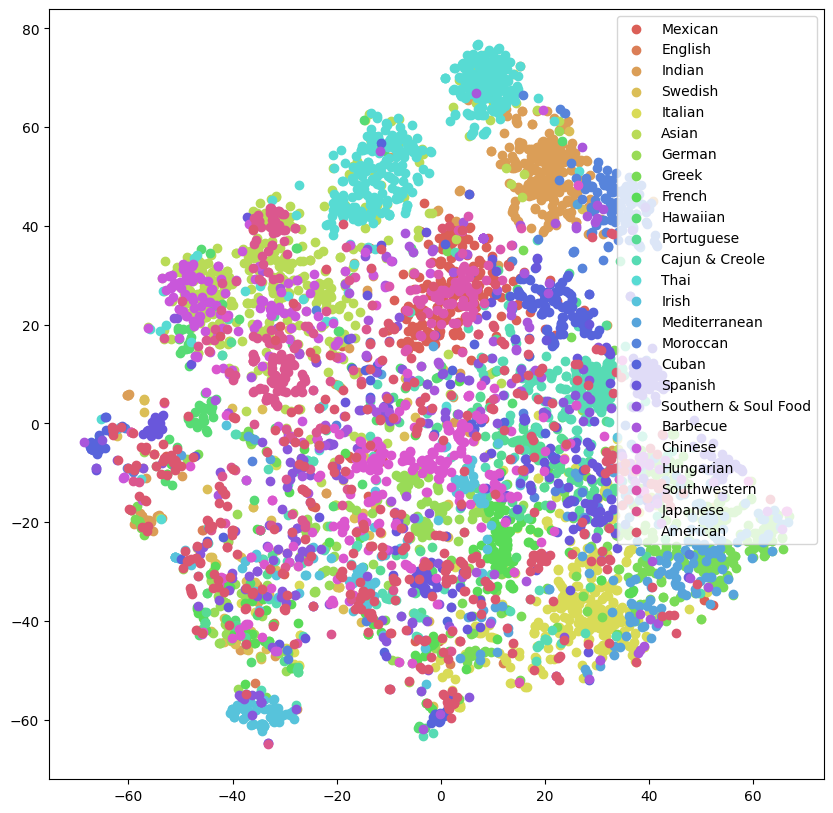

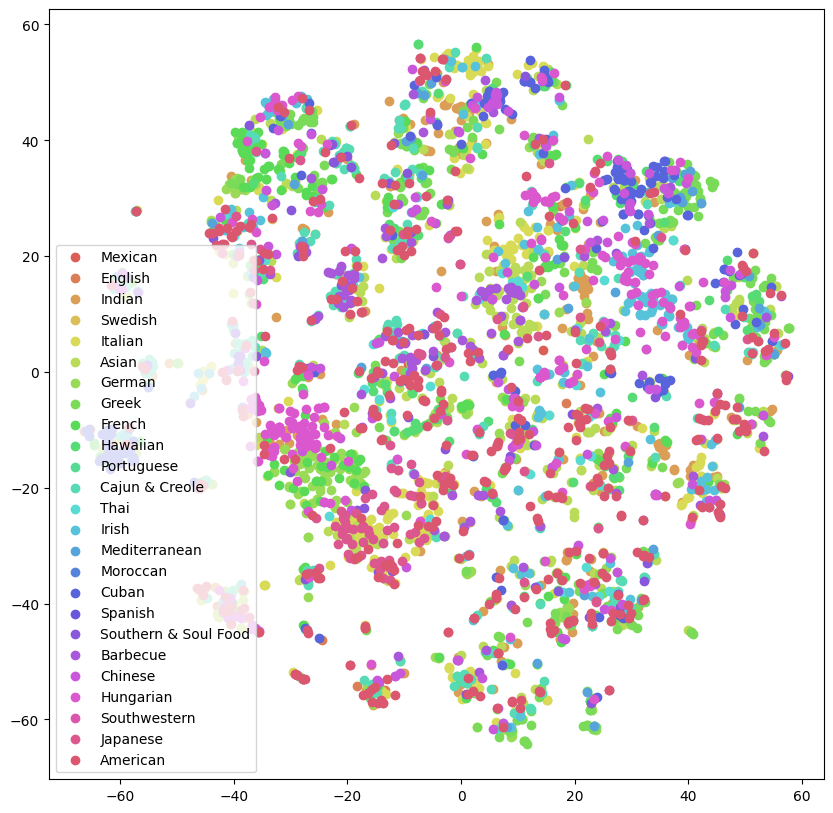

In [3]:
'''After recipes have been mapped to ingredient space and flavor space
Plot tsne clustering
Plot with bokeh interactive plotting
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import MDS, TSNE

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool

#take some regional cuisines, tsne clustering, and plotting
def tsne_cluster_cuisine(df,sublist):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(metric='precomputed', init="random").fit_transform(dist)

    palette = sns.color_palette("hls", len(sublist))
    plt.figure(figsize=(10,10))
    for i,cuisine in enumerate(sublist):
        plt.scatter(tsne[lenlist[i]:lenlist[i+1],0],\
        tsne[lenlist[i]:lenlist[i+1],1],c=palette[i],label=sublist[i])
    plt.legend()

#interactive plot with boken; set up for four categories, with color palette; pass in df for either ingredient or flavor
def plot_bokeh(df,sublist,filename):
    lenlist=[0]
    df_sub = df[df['cuisine']==sublist[0]]
    lenlist.append(df_sub.shape[0])
    for cuisine in sublist[1:]:
        temp = df[df['cuisine']==cuisine]
        df_sub = pd.concat([df_sub, temp],axis=0,ignore_index=True)
        lenlist.append(df_sub.shape[0])
    df_X = df_sub.drop(['cuisine','recipeName'],axis=1)
    print(df_X.shape, lenlist)

    dist = squareform(pdist(df_X, metric='cosine'))
    tsne = TSNE(metric='precomputed', init="random").fit_transform(dist)
    #cannot use seaborn palette for bokeh
    # palette =['red','green','blue','yellow']
    # colors =[]
    # for i in range(len(sublist)):
    #     for j in range(lenlist[i+1]-lenlist[i]):
    #         colors.append(palette[i])
    #plot with boken
    output_file(filename)
    source = ColumnDataSource(
            data=dict(x=tsne[:,0],y=tsne[:,1],
                cuisine = df_sub['cuisine'],
                recipe = df_sub['recipeName']))

    hover = HoverTool(tooltips=[
                ("cuisine", "@cuisine"),
                ("recipe", "@recipe")])

    p = figure(title="flavor clustering")

    p.circle('x', 'y', size=10, source=source)

    show(p)


if __name__ == '__main__':
    yum_ingr = pd.read_pickle('data/yummly_ingr.pkl')
    yum_ingrX = pd.read_pickle('data/yummly_ingrX.pkl')
    yum_tfidf = pd.read_pickle('data/yum_tfidf.pkl')

    #select four cuisines and plot tsne clustering with ingredients
    sublist = list(set(yum_ingr['cuisine']))
    df_ingr = yum_ingrX.copy()
    df_ingr['cuisine'] = yum_ingr['cuisine']
    df_ingr['recipeName'] = yum_ingr['recipeName']
    tsne_cluster_cuisine(df_ingr,sublist)

    #select four cuisines and plot tsne clustering with flavor
    
    df_flavor = yum_tfidf.copy()
    sublist = list(set(yum_ingr['cuisine']))
    df_flavor['cuisine'] = yum_ingr['cuisine']
    df_flavor['recipeName'] = yum_ingr['recipeName']
    tsne_cluster_cuisine(df_flavor,sublist)

    #select four cuisines and do interactive plotting with bokeh
    plot_bokeh(df_flavor,sublist, 'test1.html')
    plot_bokeh(df_ingr,sublist, 'test2.html')


In [4]:
import bokeh
print(bokeh.__version__)

3.0.3
